# P1課題補足資料のRC回路のグラフ例

### 2020/5/5 小関泰之

- P1課題補足資料に従い、LTspiceを用いてLPFの周波数特性とステップ応答を計算したら、理論曲線と比較してみましょう。
- グラフ化のソフトとしてはExcel, gnuplot, sma4winなど様々なものがありますが、ここでは、Python + matplotlib + Jupyter Notebookを使ってグラフ化を行った例を示します。
- Python 3, numpy, pandas, matplotlib, Jupyter Notebookはpip3でインストールできます。
- 動作確認はmacOS10.15.4, Python 3.7, pandas 1.0.3, numpy 1.18.2, matplotlib 3.2.1, Jupyter Notebook 6.0.1で行いました。
- 補足資料で得られるデータを表示することを前提としています。
 - 周波数特性データ名は 01_lpf_freq.txt としています。カットオフ周波数10 kHzのLPFで周波数範囲は10 Hz ~ 10 kHzです。
 - ステップ応答データ名は 02_lpf_step.txt としています。波形の時間範囲は0 ms ~ 2 msで、時間1 msから立ち上がります。
- DPI (dots per inch)を300に設定しています。

In [1]:
# おまじない
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 周波数特性データのデータフレームへの読み込み。1列目：周波数、2列目：実部、3列目：虚部。
f = '01_lpf_freq.txt' #データファイル名
df = pd.read_table(f, sep='\t+|,', engine='python', names=('Freq', 'Re', 'Im'), skiprows=1)

In [3]:
df #データフレームの中身の確認

,Freq,Re,Im
0,10.000000,0.999961,-0.006283
1,11.220185,0.999950,-0.007049
2,12.589254,0.999937,-0.007910
3,14.125375,0.999921,-0.008875
4,15.848932,0.999901,-0.009957
...,...,...,...
76,63095.734448,0.000636,-0.025208
77,70794.578438,0.000505,-0.022470
78,79432.823472,0.000401,-0.020028
79,89125.093813,0.000319,-0.017852


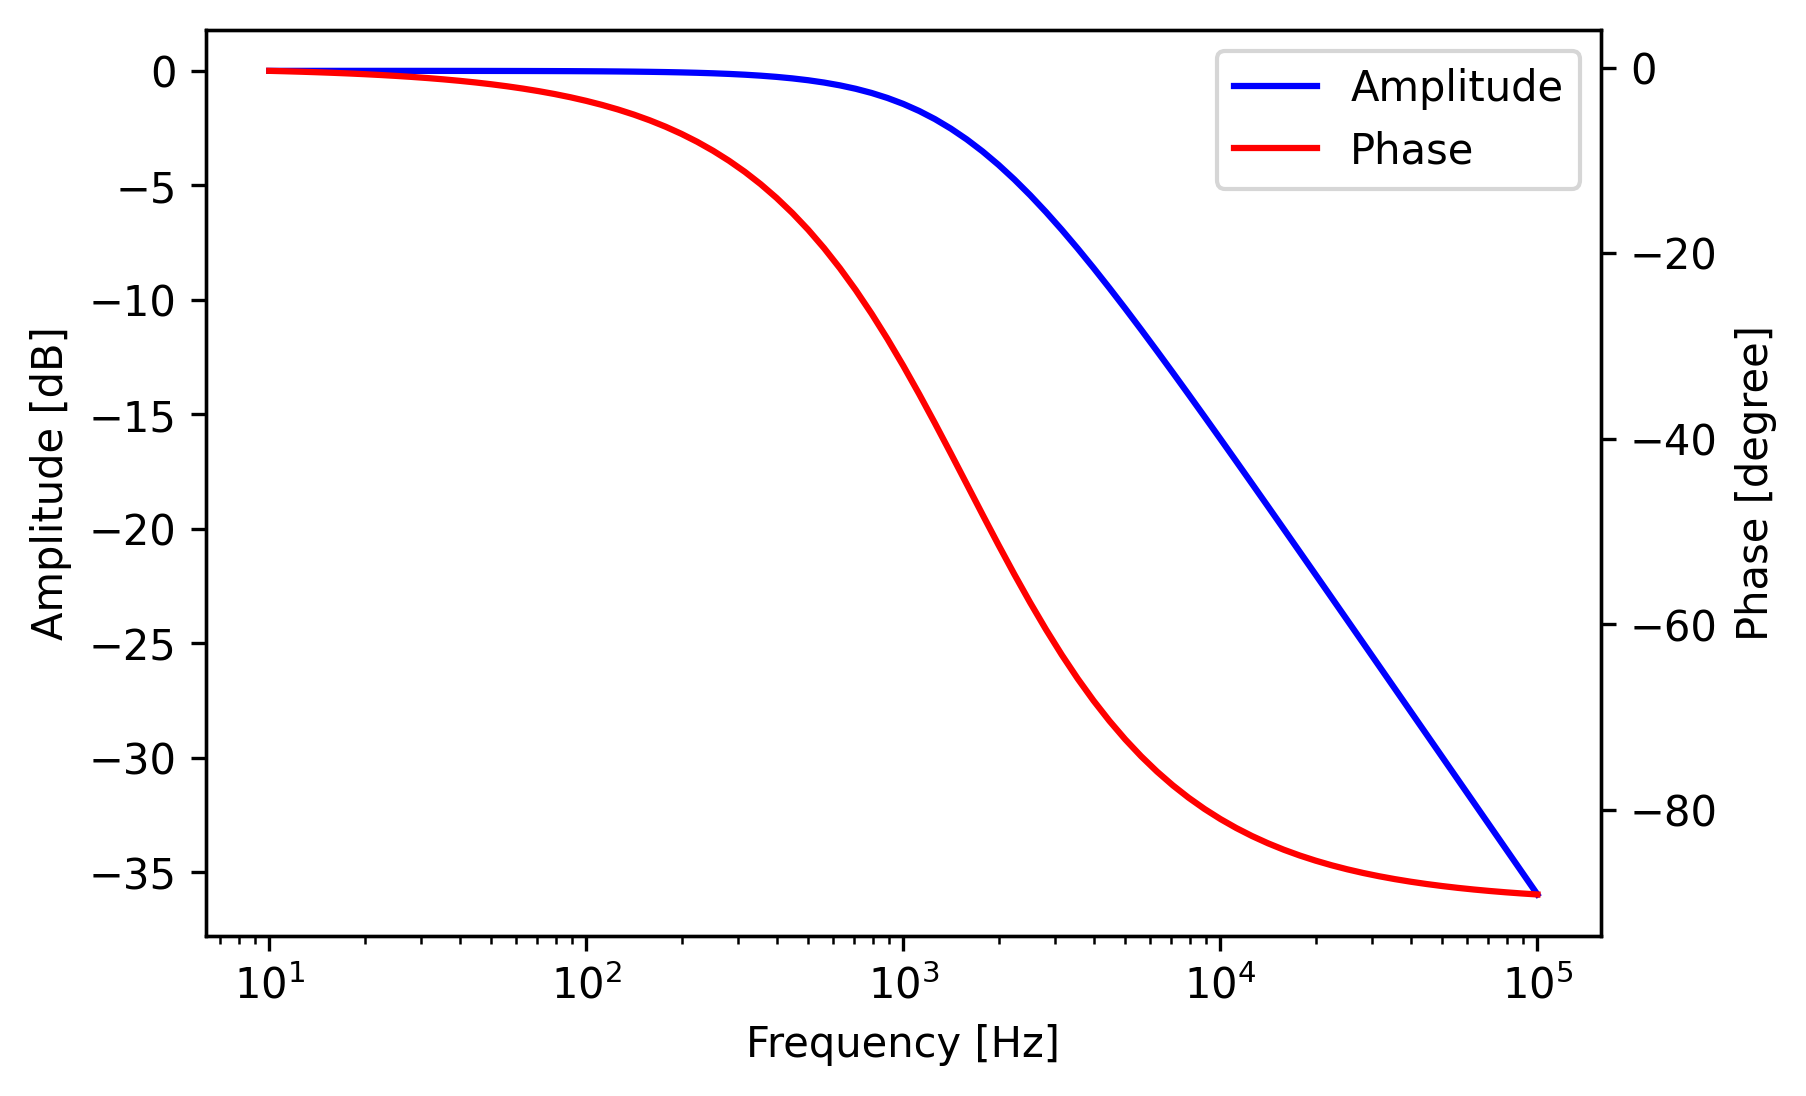

In [4]:
#周波数特性データのプロット

fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

#振幅のプロット
ax1.plot(df['Freq'], 10*np.log10(df['Re']*df['Re']+df['Im']*df['Im']), color="blue", label = 'Amplitude')
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Amplitude [dB]")

#位相のプロット
ax2.plot(df['Freq'], np.arctan2(df['Im'],df['Re'])*180/np.pi, color="red", label = 'Phase')
ax2.set_ylabel("Phase [degree]")
plt.xscale("log")

#凡例の表示
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

#グラフ画像保存
plt.savefig(f+'sim.png')
plt.show()


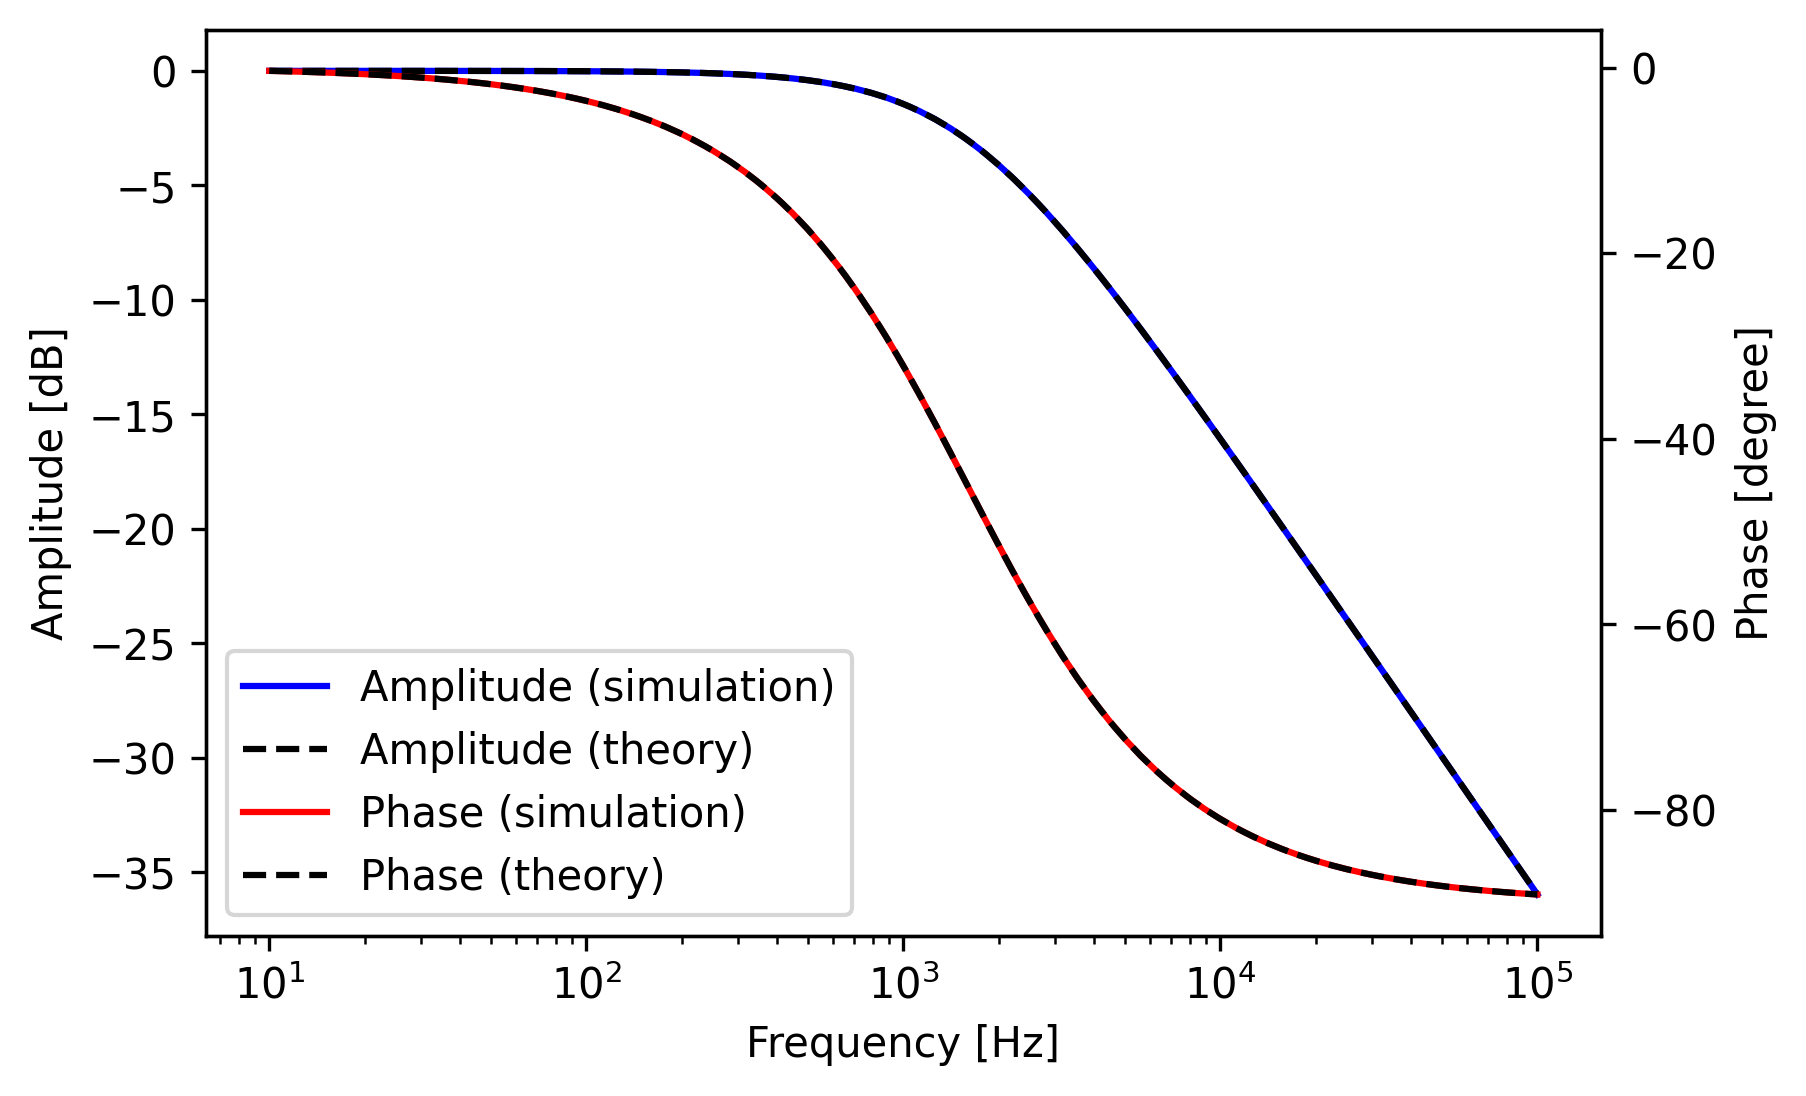

In [5]:
#シミュレーション特性と理論特性の一括表示

fc = 10000 #カットオフ周波数10 kHz
freq = np.logspace(1,5,100) #対数軸での周波数配列を10^1 ~ 10^5まで準備。
omega = freq * 2 * np.pi / fc 
real = 1/(1 + omega * omega) #LPF特性の実部
imag = -omega / (1 + omega * omega) #LPF特性の虚部

#2つの軸を使うためのおまじない
fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

#振幅のプロット
ax1.plot(df['Freq'], 10*np.log10(df['Re']*df['Re']+df['Im']*df['Im']), color="blue", label = 'Amplitude (simulation)')
ax1.plot(freq, 10*np.log10(real * real + imag * imag), color = 'black', linestyle = 'dashed', label = 'Amplitude (theory)')
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Amplitude [dB]")

#位相のプロット
ax2.plot(df['Freq'], np.arctan2(df['Im'],df['Re'])*180/np.pi, color="red", label = 'Phase (simulation)')
ax2.plot(freq, np.arctan2(imag,real)*180/np.pi, color = 'black', linestyle = 'dashed', label = 'Phase (theory)')
ax2.set_ylabel("Phase [degree]")
plt.xscale("log")

#凡例の表示
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

#画像の保存
plt.savefig(f+'.png')
plt.show()

In [6]:
#ステップ応答データの読み込み。1列目：時間、2列目：電圧。
f = '02_lpf_step.txt'
df = pd.read_table(f, names=('Time', 'Voltage'), skiprows=1)

In [7]:
df #データフレームの中身の確認

,Time,Voltage
0,0.000000,0.000000
1,0.001000,0.000000
2,0.001000,0.000046
3,0.001000,0.000090
4,0.001000,0.000228
...,...,...
110,0.001980,0.999945
111,0.001988,0.999949
112,0.001997,0.999953
113,0.001999,0.999954


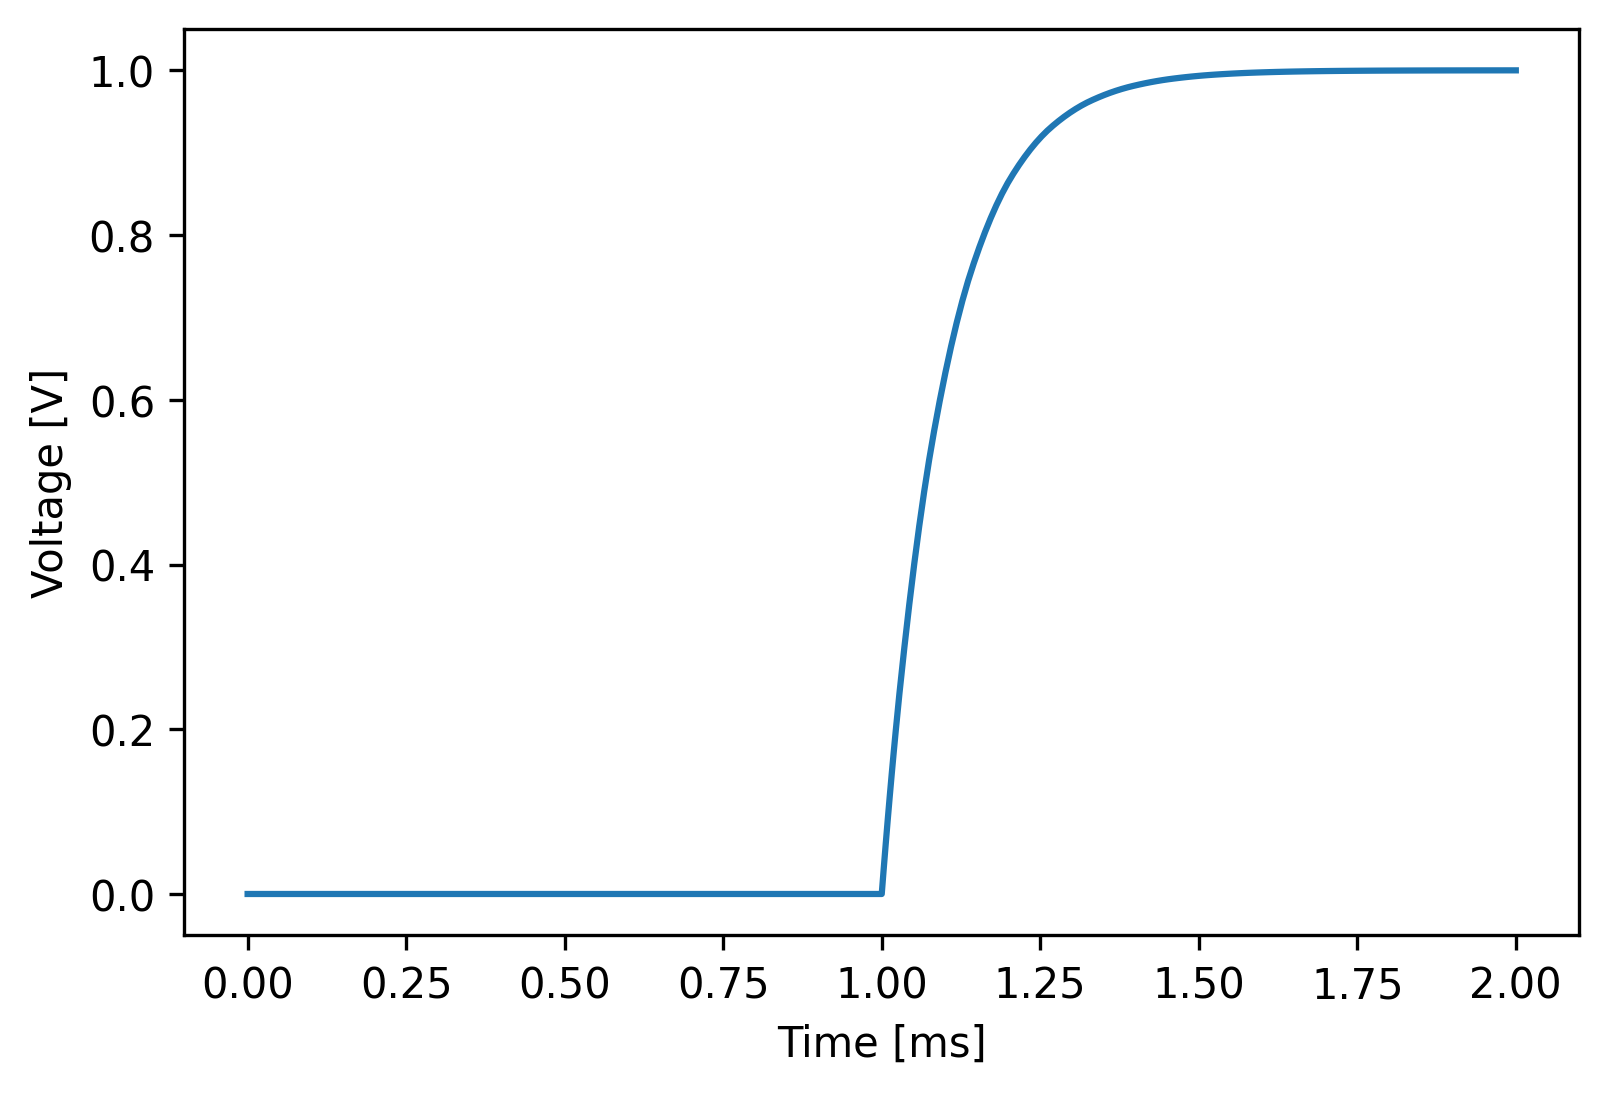

In [8]:
#ステップ応答のプロット

plt.figure(dpi = 300)
plt.xlabel('Time [ms]')
plt.ylabel('Voltage [V]')
plt.plot(df['Time'] / 0.001, df['Voltage']) #横軸をmsに変換
plt.savefig(f+'sim.png')
plt.show()

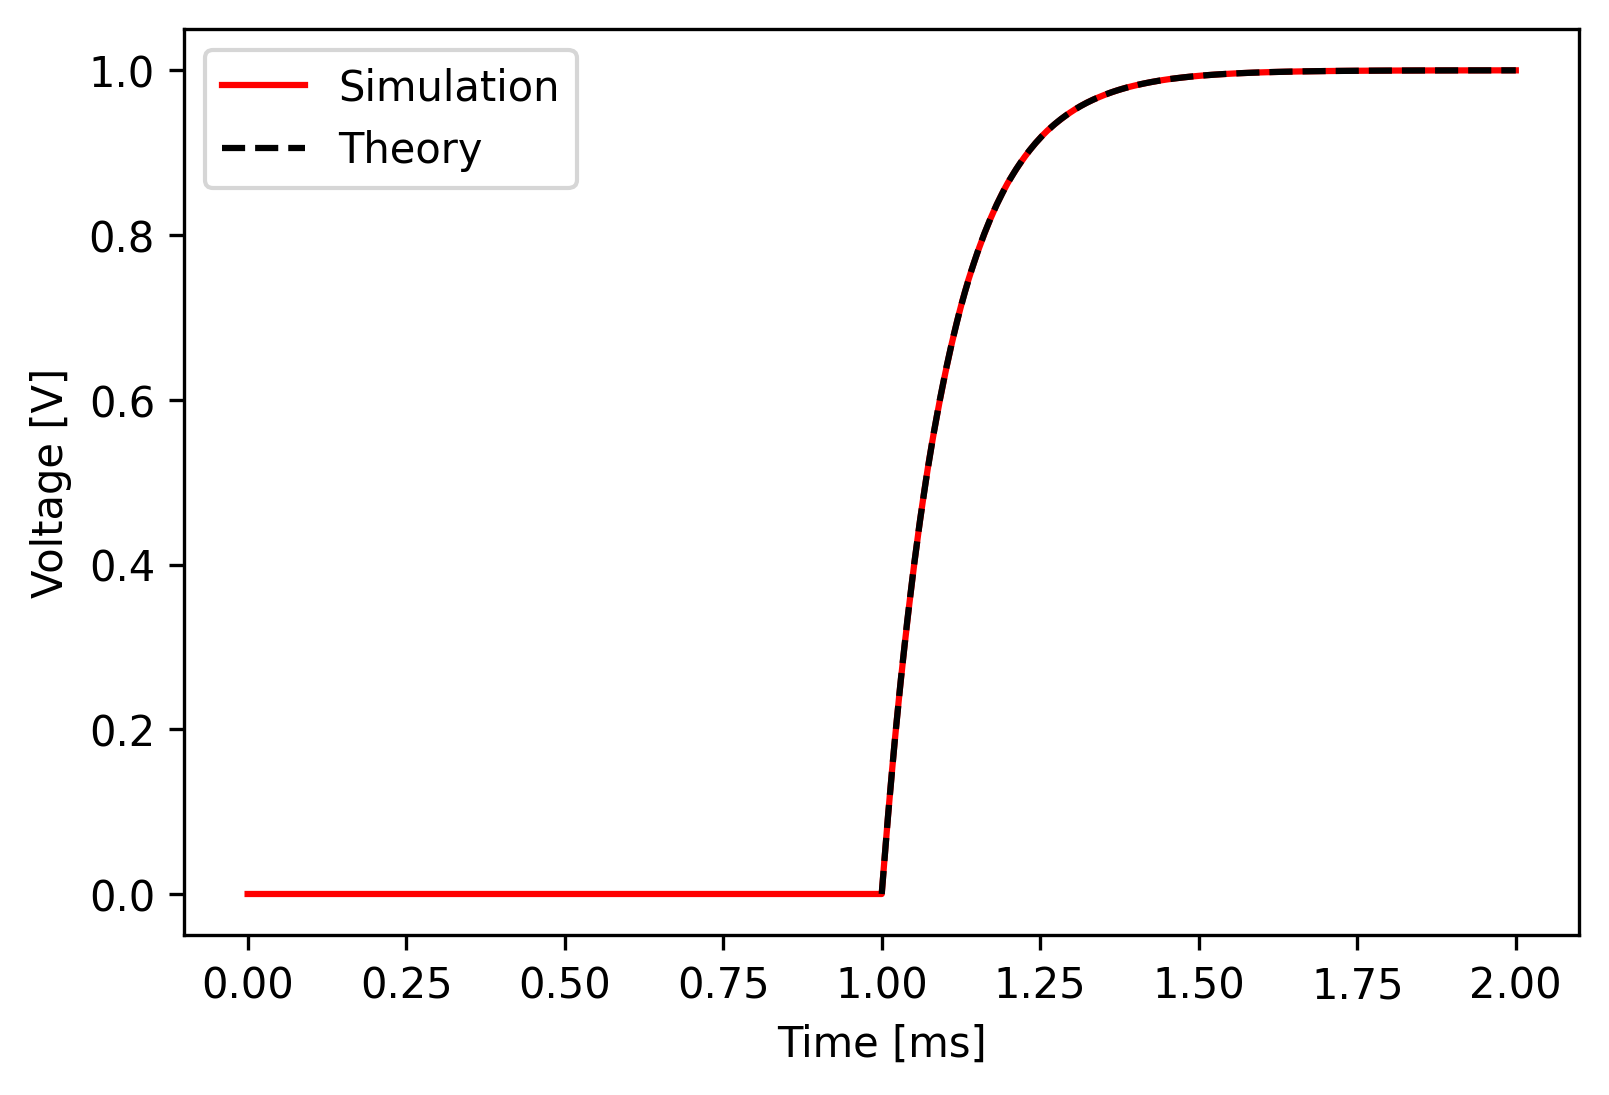

In [9]:
#シミュレーション特性と理論特性の一括表示

t = np.linspace(0, 1, 100) #時間配列を作成
v = 1.0-np.exp(-t/0.1)    #LPFのステップ応答(時定数0.1 ms)

fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('Voltage [V]')
ax1.plot(df['Time']/0.001, df['Voltage'], color = 'red', label = 'Simulation')
ax1.plot(1+t,v, color = 'black', label = 'Theory', linestyle = 'dashed')
ax1.legend()
plt.savefig(f+'.png')
plt.show()